### Importing Libraries

In [1]:
## Package that helps extract raw reviews and other info from the app store
from app_store_scraper import AppStore

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [4]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

In [7]:
## For pretty print
from pprint import pprint

### Extracting reviews

In [8]:
among_us = AppStore(country="us", app_name="Among Us")
print(among_us)

2020-11-04 22:06:10,784 [INFO] Base - Searching for app id
2020-11-04 22:06:13,912 [INFO] Base - Initialised: AppStore('us', 'among-us', 1351168404)
2020-11-04 22:06:13,912 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/among-us/id1351168404


     Country | us
        Name | among-us
          ID | 1351168404
         URL | https://apps.apple.com/us/app/among-us/id1351168404
Review count | 0


In [9]:
among_us.review(how_many=2000)
among_us.reviews_count

2020-11-04 22:06:19,067 [INFO] Base - [id:1351168404] Fetched 380 reviews (380 fetched in total)
2020-11-04 22:06:24,419 [INFO] Base - [id:1351168404] Fetched 860 reviews (860 fetched in total)
2020-11-04 22:06:29,769 [INFO] Base - [id:1351168404] Fetched 1280 reviews (1280 fetched in total)
2020-11-04 22:06:35,247 [INFO] Base - [id:1351168404] Fetched 1720 reviews (1720 fetched in total)
2020-11-04 22:06:38,489 [INFO] Base - [id:1351168404] Fetched 2000 reviews (2000 fetched in total)


2000

In [10]:
#to see structure of each review
among_us.reviews[0]

{'isEdited': False,
 'title': 'Love it but some problems',
 'rating': 4,
 'userName': 'GachaJayda',
 'review': 'So, I’ve been playing this game for months now and it’s very addicting and fun to play! I enjoy playing this with my friends, we all have a good time! Although you don’t know people you play with in random servers it’s fun playing with them to. So like I was explaining how the game is a fun experience there is also some issues I have with it. One being the hackers (you probably did something about that already, my bad if you already did) and lots and of glitches. I always get kicked out of the game due to an error or some weird glitch. I also have a problem with some of the people in the game treat it as if it’s tinder and flirt with people in the game. I know there’s probably no fixing that but it kinda gets annoying being for them to be like that. Also, I think you should make like a friend thing where like you can befriend people in the game and they can send you ( or you 

In [11]:
review_dict={}

## Creating dictionary to store username: review
for review in among_us.reviews:
    userName = review['userName']
    comments = review['review']
    review_dict.update({userName:comments})

In [12]:
## confirming number of reviews extracted
len(review_dict)

1999

## Checking ratings

In [13]:
ratings_dict={}

## Creating dictionary to store username: review
for review in among_us.reviews:
    rating = review['rating']
    if rating not in ratings_dict:
        ratings_dict[rating] = 1
    else:
        ratings_dict[rating] += 1

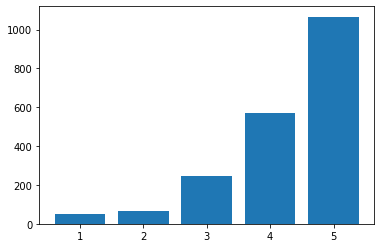

In [14]:
plt.bar(*zip(*ratings_dict.items()))
plt.show()

### Creating list of good and bad reviews

In [15]:
good_reviews = []
bad_reviews = []

for review in among_us.reviews:
    rating = review['rating']
    userName = review['userName']
    if rating > 3 :
        good_reviews.append(review_dict[userName])
    else:
        bad_reviews.append(review_dict[userName])

In [16]:
len(good_reviews)

1637

In [17]:
len(bad_reviews)

363

## Frequently used keywords

In [18]:
### Preprocessing functions to clean the documents

def preprocess_data(doc_set):
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    sentences = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        #creating a sentence of cleaned tokens
        sentence = ' '.join(stemmed_tokens)
        # add tokens to list
        sentences.append(sentence)
    return sentences

In [19]:
### Function to extract most popular keywords, bigrams or trigrams
""" 
n should provide the ngram_range => for a bigram n =2; for a trigram n=3; for top words, n=1; default =1
m should provide the number of such terms to be returned. default=10
"""
def get_top_m_words_of_n_grams(corpus,m=10, n=1):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:m]

In [20]:
## Getting a clean version of the reviews
# For the good reviews
good_reviews_clean = preprocess_data(good_reviews)
# For the bad reviews
bad_reviews_clean = preprocess_data(bad_reviews)

### For good reviews

In [21]:
print("Top 20 keywords and count")
pprint(get_top_m_words_of_n_grams(good_reviews_clean,20))

Top 20 keywords and count
[('game', 6157),
 ('play', 2458),
 ('like', 1869),
 ('peopl', 1823),
 ('would', 1575),
 ('get', 1465),
 ('friend', 1412),
 ('impost', 1223),
 ('love', 1172),
 ('realli', 1145),
 ('fun', 1121),
 ('make', 1109),
 ('one', 988),
 ('also', 946),
 ('thing', 897),
 ('time', 883),
 ('say', 843),
 ('think', 821),
 ('could', 810),
 ('us', 800)]


In [22]:
print("Top 20 bigrams and count")
pprint(get_top_m_words_of_n_grams(good_reviews_clean,20,2))

Top 20 bigrams and count
[('among us', 673),
 ('love game', 549),
 ('play game', 340),
 ('great game', 254),
 ('play friend', 213),
 ('game play', 210),
 ('crew mate', 195),
 ('add friend', 194),
 ('make game', 177),
 ('game fun', 173),
 ('realli fun', 152),
 ('game realli', 150),
 ('join game', 139),
 ('fun play', 137),
 ('would like', 135),
 ('game amaz', 127),
 ('game great', 124),
 ('pleas fix', 120),
 ('like game', 115),
 ('good game', 113)]


In [23]:
print("Top 20 trigrams and count")
pprint(get_top_m_words_of_n_grams(good_reviews_clean,20,3))

Top 20 trigrams and count
[('play among us', 91),
 ('love game much', 68),
 ('absolut love game', 59),
 ('game realli fun', 53),
 ('best game ever', 52),
 ('love among us', 51),
 ('keep good work', 40),
 ('realli love game', 40),
 ('among us great', 38),
 ('would make game', 35),
 ('call emerg meet', 35),
 ('game ever play', 35),
 ('game play friend', 34),
 ('fun play friend', 33),
 ('realli like game', 32),
 ('love game play', 31),
 ('game much fun', 30),
 ('realli good game', 29),
 ('love game fun', 28),
 ('would love see', 27)]


### For bad reviews

In [24]:
print("Top 20 keywords and count")
pprint(get_top_m_words_of_n_grams(bad_reviews_clean,20))

Top 20 keywords and count
[('game', 1678),
 ('play', 704),
 ('peopl', 488),
 ('get', 461),
 ('like', 337),
 ('time', 309),
 ('say', 277),
 ('impost', 264),
 ('would', 244),
 ('realli', 243),
 ('make', 237),
 ('fun', 236),
 ('also', 236),
 ('fix', 218),
 ('one', 215),
 ('friend', 211),
 ('server', 197),
 ('thing', 195),
 ('tri', 191),
 ('join', 187)]


In [25]:
print("Top 20 bigrams and count")
pprint(get_top_m_words_of_n_grams(bad_reviews_clean,20,2))

Top 20 bigrams and count
[('play game', 130),
 ('among us', 110),
 ('love game', 81),
 ('game play', 59),
 ('realli fun', 52),
 ('play friend', 52),
 ('make game', 49),
 ('join game', 46),
 ('everi time', 46),
 ('pleas fix', 45),
 ('get kick', 44),
 ('game fun', 43),
 ('game realli', 38),
 ('great game', 38),
 ('fun game', 38),
 ('get game', 36),
 ('tri play', 34),
 ('leav game', 32),
 ('want play', 31),
 ('fun play', 30)]


In [26]:
print("Top 20 trigrams and count")
pprint(get_top_m_words_of_n_grams(bad_reviews_clean,20,3))

Top 20 trigrams and count
[('game realli fun', 21),
 ('play among us', 18),
 ('tri play game', 12),
 ('version among us', 12),
 ('game play friend', 11),
 ('old version among', 10),
 ('realli fun game', 9),
 ('game super fun', 9),
 ('everi singl time', 9),
 ('absolut love game', 8),
 ('want play game', 8),
 ('love game play', 7),
 ('get kick game', 7),
 ('peopl leav game', 7),
 ('join anoth game', 7),
 ('realli love game', 7),
 ('get disconnect server', 7),
 ('kick peopl game', 6),
 ('realli fun play', 6),
 ('among us great', 6)]


# Topic Modelling

In [27]:
## function to tokenize each review doc
def split_sentence_to_words(review_list):
    tokenizer = RegexpTokenizer(r'\w+')
    words = []
    for review in review_list:
        tokens = tokenizer.tokenize(review)
        words.append(tokens)
    return(words)

In [28]:
def prepare_corpus(cleaned_documents_list):
    """
    Input  : cleaned documents list
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index
    dictionary = corpora.Dictionary(cleaned_documents_list)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in cleaned_documents_list]
    # generate LDA model
    return dictionary,doc_term_matrix

In [29]:
def create_gensim_lsa_model(clean_documents_list,number_of_topics,words):
    """
    Input  : clean documents list, number of topics, number of words associated with each topic
    Output : LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(clean_documents_list)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    #print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [30]:
def compute_coherence_values(term_dictionary, doc_term_matrix, cleaned_documents_list, start, stop, step):
    """
    Input: term_dictionary, doc_term_matrix, cleaned_documents_list, 
           start(Min. number of topics),
           stop(Max. num of topics)
           step(Step size when increasing the number of topics) 
    Output  : coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for number_of_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = term_dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=cleaned_documents_list, 
                                        dictionary=term_dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return coherence_values

In [31]:
def plot_graph(coherence_values,start, stop, step):
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    return

### For good reviews

In [38]:
## testing what the optimum number of topics are
start,stop,step=2,12,1

clean_documents_list=split_sentence_to_words(good_reviews_clean)

term_dictionary, doc_term_matrix = prepare_corpus(clean_documents_list)

coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_documents_list, start, stop, step)

2020-11-04 22:34:23,097 [INFO] gensim.corpora.dictionary - adding document #0 to Dictionary(0 unique tokens: [])
2020-11-04 22:34:23,413 [INFO] gensim.corpora.dictionary - built Dictionary(4239 unique tokens: ['accept', 'add', 'addict', 'alreadi', 'also']...) from 1637 documents (total 107514 corpus positions)
2020-11-04 22:34:23,548 [INFO] gensim.models.lsimodel - using serial LSI version on this node
2020-11-04 22:34:23,548 [INFO] gensim.models.lsimodel - updating model with new documents
2020-11-04 22:34:23,556 [INFO] gensim.models.lsimodel - preparing a new chunk of documents
2020-11-04 22:34:23,576 [INFO] gensim.models.lsimodel - using 100 extra samples and 2 power iterations
2020-11-04 22:34:23,576 [INFO] gensim.models.lsimodel - 1st phase: constructing (4239, 102) action matrix
2020-11-04 22:34:23,623 [INFO] gensim.models.lsimodel - orthonormalizing (4239, 102) action matrix
2020-11-04 22:34:23,739 [INFO] gensim.models.lsimodel - 2nd phase: running dense svd on (102, 1637) matri

2020-11-04 22:34:48,946 [INFO] gensim.models.lsimodel - topic #1(77.004): -0.568*"game" + 0.391*"would" + 0.373*"like" + 0.189*"friend" + 0.188*"could" + 0.175*"add" + 0.165*"peopl" + 0.147*"impost" + 0.143*"think" + 0.135*"make"
2020-11-04 22:34:48,946 [INFO] gensim.models.lsimodel - topic #2(65.394): -0.630*"impost" + 0.442*"friend" + -0.253*"get" + 0.252*"play" + -0.222*"kill" + 0.163*"would" + -0.141*"task" + 0.122*"add" + -0.103*"like" + -0.099*"crew"
2020-11-04 22:34:48,946 [INFO] gensim.models.lsimodel - topic #3(61.113): 0.633*"play" + -0.359*"would" + -0.341*"game" + 0.303*"peopl" + -0.181*"like" + 0.173*"get" + 0.160*"impost" + -0.118*"could" + 0.115*"friend" + 0.108*"time"
2020-11-04 22:34:48,946 [INFO] gensim.models.lsimodel - topic #4(56.323): 0.499*"peopl" + -0.385*"play" + -0.288*"impost" + 0.253*"say" + -0.197*"friend" + 0.190*"server" + 0.158*"join" + -0.147*"would" + 0.142*"pleas" + 0.134*"fix"
2020-11-04 22:34:48,962 [INFO] gensim.topic_coherence.probability_estimati

2020-11-04 22:35:14,352 [INFO] gensim.models.lsimodel - topic #2(65.394): -0.630*"impost" + 0.442*"friend" + -0.253*"get" + 0.252*"play" + -0.222*"kill" + 0.163*"would" + -0.141*"task" + 0.122*"add" + -0.103*"like" + -0.099*"crew"
2020-11-04 22:35:14,352 [INFO] gensim.models.lsimodel - topic #3(61.113): -0.633*"play" + 0.359*"would" + 0.341*"game" + -0.303*"peopl" + 0.181*"like" + -0.173*"get" + -0.160*"impost" + 0.118*"could" + -0.115*"friend" + -0.108*"time"
2020-11-04 22:35:14,352 [INFO] gensim.models.lsimodel - topic #4(56.323): 0.499*"peopl" + -0.385*"play" + -0.288*"impost" + 0.252*"say" + -0.197*"friend" + 0.190*"server" + 0.158*"join" + -0.147*"would" + 0.142*"pleas" + 0.133*"fix"
2020-11-04 22:35:14,362 [INFO] gensim.topic_coherence.probability_estimation - using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2020-11-04 22:35:22,472 [INFO] gensim.topic_coherence.text_analysis - 1 batches submitted to accumulate stat

2020-11-04 22:35:40,817 [INFO] gensim.models.lsimodel - topic #2(65.394): -0.631*"impost" + 0.442*"friend" + -0.253*"get" + 0.252*"play" + -0.222*"kill" + 0.162*"would" + -0.141*"task" + 0.122*"add" + -0.103*"like" + -0.099*"crew"
2020-11-04 22:35:40,833 [INFO] gensim.models.lsimodel - topic #3(61.113): -0.633*"play" + 0.359*"would" + 0.341*"game" + -0.303*"peopl" + 0.181*"like" + -0.173*"get" + -0.160*"impost" + 0.119*"could" + -0.115*"friend" + -0.108*"time"
2020-11-04 22:35:40,833 [INFO] gensim.models.lsimodel - topic #4(56.323): -0.499*"peopl" + 0.385*"play" + 0.288*"impost" + -0.253*"say" + 0.197*"friend" + -0.190*"server" + -0.157*"join" + 0.147*"would" + -0.142*"pleas" + -0.133*"fix"
2020-11-04 22:35:40,833 [INFO] gensim.topic_coherence.probability_estimation - using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2020-11-04 22:35:48,917 [INFO] gensim.topic_coherence.text_analysis - 1 batches submitted to accumulate st

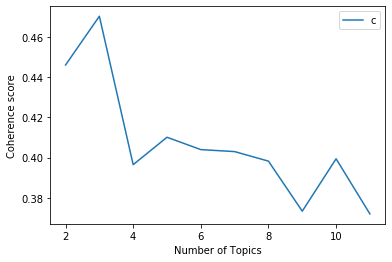

In [39]:
plot_graph(coherence_values,start,stop,step)

In [40]:
number_of_topics=3
words=10
model=create_gensim_lsa_model(clean_documents_list,number_of_topics,words)
pprint(model.print_topics(num_topics=number_of_topics, num_words=words))

2020-11-04 22:38:11,128 [INFO] gensim.corpora.dictionary - adding document #0 to Dictionary(0 unique tokens: [])
2020-11-04 22:38:11,445 [INFO] gensim.corpora.dictionary - built Dictionary(4239 unique tokens: ['accept', 'add', 'addict', 'alreadi', 'also']...) from 1637 documents (total 107514 corpus positions)
2020-11-04 22:38:11,529 [INFO] gensim.models.lsimodel - using serial LSI version on this node
2020-11-04 22:38:11,529 [INFO] gensim.models.lsimodel - updating model with new documents
2020-11-04 22:38:11,529 [INFO] gensim.models.lsimodel - preparing a new chunk of documents
2020-11-04 22:38:11,551 [INFO] gensim.models.lsimodel - using 100 extra samples and 2 power iterations
2020-11-04 22:38:11,551 [INFO] gensim.models.lsimodel - 1st phase: constructing (4239, 103) action matrix
2020-11-04 22:38:11,567 [INFO] gensim.models.lsimodel - orthonormalizing (4239, 103) action matrix
2020-11-04 22:38:11,730 [INFO] gensim.models.lsimodel - 2nd phase: running dense svd on (103, 1637) matri

[(0,
  '-0.691*"game" + -0.266*"play" + -0.202*"like" + -0.198*"peopl" + '
  '-0.167*"would" + -0.152*"friend" + -0.150*"get" + -0.125*"love" + '
  '-0.123*"realli" + -0.122*"impost"'),
 (1,
  '-0.568*"game" + 0.391*"would" + 0.373*"like" + 0.189*"friend" + '
  '0.188*"could" + 0.175*"add" + 0.165*"peopl" + 0.147*"impost" + '
  '0.143*"think" + 0.135*"make"'),
 (2,
  '-0.630*"impost" + 0.442*"friend" + -0.253*"get" + 0.252*"play" + '
  '-0.222*"kill" + 0.162*"would" + -0.141*"task" + 0.122*"add" + -0.103*"like" '
  '+ -0.099*"crew"')]


### For bad reviews

In [35]:
## getting optimum number of topics
start,stop,step=2,12,1

clean_documents_list=split_sentence_to_words(bad_reviews_clean)

term_dictionary, doc_term_matrix = prepare_corpus(clean_documents_list)

coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_documents_list, start, stop, step)

2020-11-04 22:15:32,966 [INFO] gensim.corpora.dictionary - adding document #0 to Dictionary(0 unique tokens: [])
2020-11-04 22:15:33,050 [INFO] gensim.corpora.dictionary - built Dictionary(2373 unique tokens: ['abl', 'across', 'actual', 'allow', 'alreadi']...) from 363 documents (total 27464 corpus positions)
2020-11-04 22:15:33,097 [INFO] gensim.models.lsimodel - using serial LSI version on this node
2020-11-04 22:15:33,113 [INFO] gensim.models.lsimodel - updating model with new documents
2020-11-04 22:15:33,113 [INFO] gensim.models.lsimodel - preparing a new chunk of documents
2020-11-04 22:15:33,129 [INFO] gensim.models.lsimodel - using 100 extra samples and 2 power iterations
2020-11-04 22:15:33,129 [INFO] gensim.models.lsimodel - 1st phase: constructing (2373, 102) action matrix
2020-11-04 22:15:33,135 [INFO] gensim.models.lsimodel - orthonormalizing (2373, 102) action matrix
2020-11-04 22:15:33,213 [INFO] gensim.models.lsimodel - 2nd phase: running dense svd on (102, 363) matrix


2020-11-04 22:16:01,845 [INFO] gensim.models.lsimodel - topic #3(31.084): -0.614*"impost" + 0.309*"peopl" + 0.302*"play" + -0.249*"get" + -0.171*"game" + 0.146*"friend" + -0.122*"like" + 0.118*"would" + 0.116*"say" + -0.109*"time"
2020-11-04 22:16:01,851 [INFO] gensim.models.lsimodel - topic #4(29.213): -0.470*"play" + 0.282*"get" + 0.269*"would" + 0.229*"say" + 0.209*"us" + 0.197*"among" + -0.192*"peopl" + 0.182*"hack" + 0.179*"like" + -0.169*"game"
2020-11-04 22:16:01,851 [INFO] gensim.topic_coherence.probability_estimation - using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2020-11-04 22:16:09,498 [INFO] gensim.topic_coherence.text_analysis - 7 accumulators retrieved from output queue
2020-11-04 22:16:09,526 [INFO] gensim.topic_coherence.text_analysis - accumulated word occurrence stats for 645 virtual documents
2020-11-04 22:16:09,760 [INFO] gensim.models.lsimodel - using serial LSI version on this node
2020-11-04 22:

2020-11-04 22:16:35,678 [INFO] gensim.topic_coherence.text_analysis - 7 accumulators retrieved from output queue
2020-11-04 22:16:35,710 [INFO] gensim.topic_coherence.text_analysis - accumulated word occurrence stats for 645 virtual documents
2020-11-04 22:16:36,186 [INFO] gensim.models.lsimodel - using serial LSI version on this node
2020-11-04 22:16:36,186 [INFO] gensim.models.lsimodel - updating model with new documents
2020-11-04 22:16:36,186 [INFO] gensim.models.lsimodel - preparing a new chunk of documents
2020-11-04 22:16:36,202 [INFO] gensim.models.lsimodel - using 100 extra samples and 2 power iterations
2020-11-04 22:16:36,202 [INFO] gensim.models.lsimodel - 1st phase: constructing (2373, 109) action matrix
2020-11-04 22:16:36,218 [INFO] gensim.models.lsimodel - orthonormalizing (2373, 109) action matrix
2020-11-04 22:16:36,318 [INFO] gensim.models.lsimodel - 2nd phase: running dense svd on (109, 363) matrix
2020-11-04 22:16:36,334 [INFO] gensim.models.lsimodel - computing th

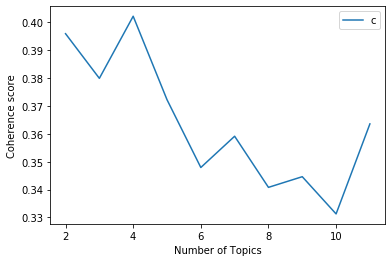

In [36]:
plot_graph(coherence_values,start,stop,step)

In [37]:
number_of_topics=4
words=10
model=create_gensim_lsa_model(clean_documents_list,number_of_topics,words)
pprint(model.print_topics(num_topics=number_of_topics, num_words=words))

2020-11-04 22:19:46,088 [INFO] gensim.corpora.dictionary - adding document #0 to Dictionary(0 unique tokens: [])
2020-11-04 22:19:46,182 [INFO] gensim.corpora.dictionary - built Dictionary(2373 unique tokens: ['abl', 'across', 'actual', 'allow', 'alreadi']...) from 363 documents (total 27464 corpus positions)
2020-11-04 22:19:46,220 [INFO] gensim.models.lsimodel - using serial LSI version on this node
2020-11-04 22:19:46,220 [INFO] gensim.models.lsimodel - updating model with new documents
2020-11-04 22:19:46,220 [INFO] gensim.models.lsimodel - preparing a new chunk of documents
2020-11-04 22:19:46,235 [INFO] gensim.models.lsimodel - using 100 extra samples and 2 power iterations
2020-11-04 22:19:46,235 [INFO] gensim.models.lsimodel - 1st phase: constructing (2373, 104) action matrix
2020-11-04 22:19:46,251 [INFO] gensim.models.lsimodel - orthonormalizing (2373, 104) action matrix
2020-11-04 22:19:46,320 [INFO] gensim.models.lsimodel - 2nd phase: running dense svd on (104, 363) matrix


[(0,
  '-0.726*"game" + -0.295*"play" + -0.200*"peopl" + -0.188*"get" + '
  '-0.137*"like" + -0.123*"time" + -0.113*"say" + -0.105*"impost" + '
  '-0.103*"would" + -0.100*"realli"'),
 (1,
  '-0.572*"peopl" + 0.423*"game" + -0.335*"like" + -0.317*"impost" + '
  '-0.154*"also" + -0.142*"make" + -0.115*"kill" + -0.110*"thing" + '
  '-0.088*"vote" + 0.084*"work"'),
 (2,
  '0.562*"play" + -0.376*"game" + 0.369*"get" + -0.295*"peopl" + 0.219*"time" '
  '+ 0.123*"tri" + 0.122*"disconnect" + 0.109*"impost" + 0.107*"friend" + '
  '0.102*"fix"'),
 (3,
  '0.614*"impost" + -0.309*"peopl" + -0.302*"play" + 0.249*"get" + '
  '0.171*"game" + -0.146*"friend" + 0.122*"like" + -0.118*"would" + '
  '-0.116*"say" + 0.109*"time"')]
